In [4]:
import torch
torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device(type='cuda', index=0)

['NanumGothic']


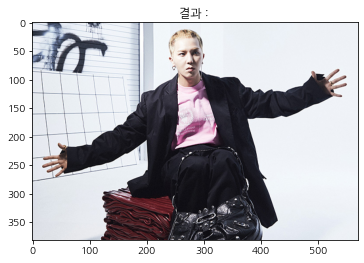

In [6]:
import matplotlib
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

fontpath = 'C:/Windows/Fonts/NanumGothicLight.ttf'
font = fm.FontProperties(fname=fontpath, size=10).get_name()
plt.rc('font', family=font)

print(plt.rcParams['font.family'])



image = 'test_image.jpg'
image = img.imread(image)

plt.imshow(image)
plt.title('결과 : ')
plt.show()

In [31]:
import torch.nn as nn
import torch.optim as optim

model = models.resnet34(pretrained=True)


num_features = model.fc.in_features

model.fc = nn.Sequential(     
    nn.Linear(num_features, 256),        # 마지막 완전히 연결된 계층에 대한 입력은 선형 계층, 256개의 출력값을 가짐
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 5),      # Since 10 possible outputs = 10 classes
    nn.LogSoftmax(dim=1)              # For using NLLLoss()
)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)

model = model.to(device)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

torch.Size([1, 3, 224, 224])
['cat', 'fox', 'dog']
Prediction 1 : cat , Score:  0.2360383
Prediction 2 : fox , Score:  0.2141402
Prediction 3 : dog , Score:  0.19886847


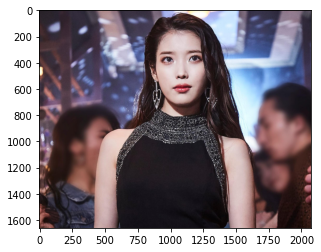

In [32]:
import torch
import torchvision
from torchvision import models, datasets, transforms
import os
import matplotlib.pyplot as plt

#model = torch.load("./weight/model_best_epoch.pt")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

data_dir = './data'
train_datasets = datasets.ImageFolder(os.path.join(data_dir,'train'), transforms_train)
class_names = train_datasets.classes

from PIL import Image
image = './static/img.jpg'
image = Image.open(image)
plt.imshow(image)

image = transforms_test(image).unsqueeze(0).to(device)
print(image.size())


with torch.no_grad():
    model.eval()
    outputs = model(image)
    outputs = torch.exp(outputs)
    topk, topclass = outputs.topk(3, dim=1)
    #cls = class_names[topclass.cpu().numpy()[0][0]]
    #score = topk.cpu().numpy()[0][0]
    
    classes = [class_names[i] for i in topclass.cpu().numpy()[0]]
    print(classes)

    for i in range(3):
            print("Prediction", i+1, ":", class_names[topclass.cpu().numpy()[0][i]], ", Score: ", topk.cpu().numpy()[0][i])

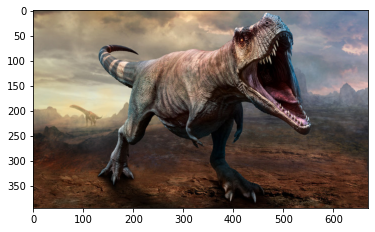

In [34]:
class_name = "dog"
pr_image = Image.open("./data/train/" + class_name + "/4.jpg")
pr_image.save("./static/" + class_name + ".jpg","jpeg")
plt.imshow(pr_image)

IndexError: list index out of range

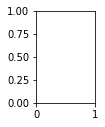

In [36]:
from glob import glob
from PIL import Image

train_images = []
train_dir = './data/train/dog'

train_folders = sorted(glob(train_dir + '/*'), key = lambda x: x.split("\\")[-1].split('.')[0])
for train_folder in train_folders:
    image_paths = glob(train_folder + '/*')
    for image_path in image_paths: train_images.append(image_path)

plt.figure(figsize = (25,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  ti = train_images[i]
  img = Image.open(ti)
  img = np.array(img, np.uint8)
  plt.imshow(img)
  plt.subplot(10,10,i+1).set_title(ti.split("\\")[-1].split('.')[0])

plt.show()